In [1]:
import graph_generator as gg
import obm_dp as dp
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader
from torch_geometric.data import InMemoryDataset
import torch
import math
import time
from util import diff
from gnn_library.util import train, objectview

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 2.0.0+cu117
Using device: cuda


In [8]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 1,
    'hidden_dim':        64,
    'dropout':           0.35,
    'epochs':            50,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}
args = objectview(args)

m = 10; n = 6; train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 3,
    'weighted': True
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

class Dataset(InMemoryDataset):

    def __init__(self, data_list):
        super().__init__(None)
        self.data, self.slices = self.collate(data_list)


train_dataset = Dataset(
    [
        *gg.generate_examples(train_num, 10, 6, np.random.uniform(0.5, 1, m), args.head, **er_config),
        *gg.generate_examples(train_num, 10, 6, np.random.uniform(0.5, 1, m), args.head, **ba_config),
        *gg.generate_examples(2 * train_num, 10, 6, np.random.uniform(0.5, 1, m), args.head, **geom_config),
    ]
)

test_dataset = Dataset(
    [
        *gg.generate_examples(test_num, 10, 6, np.random.uniform(0.5, 1, m), args.head, **er_config),
        *gg.generate_examples(test_num, 10, 6, np.random.uniform(0.5, 1, m), args.head, **ba_config),
        *gg.generate_examples(2 * test_num, 10, 6, np.random.uniform(0.5, 1, m), args.head, **geom_config)
    ]
)

train_loader = DataLoader(
    train_dataset,
    batch_size=args.batch_size,
    shuffle=True,
    num_workers=16
)

test_loader = DataLoader(
    test_dataset,
    batch_size=args.batch_size,
    shuffle=True,
    num_workers=16
)



In [9]:
train_losses, test_losses, trained_model, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/50 [00:00<?, ?Epochs/s]

0.0023848596392199396


Training:   2%|▏         | 1/50 [00:05<04:10,  5.12s/Epochs]

TEST LOSS: 0.0006865332252345979


Training:   4%|▍         | 2/50 [00:08<03:12,  4.01s/Epochs]

0.0009924940285272897
0.0007363361925818026


Training:   6%|▌         | 3/50 [00:12<03:20,  4.28s/Epochs]

TEST LOSS: 0.000382967438781634


Training:   8%|▊         | 4/50 [00:16<02:57,  3.86s/Epochs]

0.0006141193683724851
0.0005446414137259126


Training:  10%|█         | 5/50 [00:20<03:05,  4.12s/Epochs]

TEST LOSS: 0.0003246059932280332


Training:  12%|█▏        | 6/50 [00:23<02:47,  3.81s/Epochs]

0.00047925590164959433
0.0004616518437396735


Training:  14%|█▍        | 7/50 [00:28<02:54,  4.07s/Epochs]

TEST LOSS: 0.0003144670627079904


Training:  16%|█▌        | 8/50 [00:31<02:37,  3.75s/Epochs]

0.0004353402957785875
0.0004020233637420461


Training:  18%|█▊        | 9/50 [00:36<02:43,  3.98s/Epochs]

TEST LOSS: 0.0002902722917497158


Training:  20%|██        | 10/50 [00:39<02:30,  3.75s/Epochs]

0.0003817321601090953
0.0003658879526192322


Training:  22%|██▏       | 11/50 [00:44<02:37,  4.03s/Epochs]

TEST LOSS: 0.000325417349813506


Training:  24%|██▍       | 12/50 [00:47<02:24,  3.81s/Epochs]

0.00034610114630777386
0.000342054279637523


Training:  26%|██▌       | 13/50 [00:52<02:34,  4.17s/Epochs]

TEST LOSS: 0.0002674647548701614


Training:  28%|██▊       | 14/50 [00:55<02:19,  3.88s/Epochs]

0.000332185422652401
0.00032959099754225463


Training:  30%|███       | 15/50 [01:00<02:23,  4.11s/Epochs]

TEST LOSS: 0.00030480517307296395


Training:  32%|███▏      | 16/50 [01:03<02:11,  3.87s/Epochs]

0.0003023358945501968
0.0003012086657108739


Training:  34%|███▍      | 17/50 [01:08<02:16,  4.14s/Epochs]

TEST LOSS: 0.00028444884810596704


Training:  36%|███▌      | 18/50 [01:11<02:03,  3.85s/Epochs]

0.00028649009973742066
0.0002821151226526126


Training:  38%|███▊      | 19/50 [01:16<02:10,  4.21s/Epochs]

TEST LOSS: 0.00024091164232231677


Training:  40%|████      | 20/50 [01:19<01:56,  3.89s/Epochs]

0.0002741005547577515
0.0002781282716896385


Training:  42%|████▏     | 21/50 [01:24<02:01,  4.19s/Epochs]

TEST LOSS: 0.00023215966939460486


Training:  44%|████▍     | 22/50 [01:27<01:49,  3.93s/Epochs]

0.0002688418000470847
0.0002643157560378313


Training:  46%|████▌     | 23/50 [01:32<01:52,  4.17s/Epochs]

TEST LOSS: 0.00027396815130487084


Training:  48%|████▊     | 24/50 [01:35<01:40,  3.86s/Epochs]

0.00025941955368034543
0.0002443485833937302


Training:  50%|█████     | 25/50 [01:40<01:42,  4.10s/Epochs]

TEST LOSS: 0.0003197547048330307


Training:  52%|█████▏    | 26/50 [01:43<01:31,  3.81s/Epochs]

0.000252451944979839
0.0002473373253596947


Training:  54%|█████▍    | 27/50 [01:48<01:32,  4.04s/Epochs]

TEST LOSS: 0.0003376150853000581


Training:  56%|█████▌    | 28/50 [01:51<01:23,  3.80s/Epochs]

0.00024095870193559677
0.00024357373593375086


Training:  58%|█████▊    | 29/50 [01:55<01:24,  4.01s/Epochs]

TEST LOSS: 0.0001868558319984004


Training:  60%|██████    | 30/50 [01:58<01:14,  3.75s/Epochs]

0.00023891106015071272
0.00023491662682499737


Training:  62%|██████▏   | 31/50 [02:03<01:17,  4.07s/Epochs]

TEST LOSS: 0.00022785244800616056


Training:  64%|██████▍   | 32/50 [02:07<01:10,  3.89s/Epochs]

0.00024231763230636715
0.00023374981782399117


Training:  66%|██████▌   | 33/50 [02:12<01:11,  4.18s/Epochs]

TEST LOSS: 0.0002962882281281054


Training:  68%|██████▊   | 34/50 [02:15<01:02,  3.94s/Epochs]

0.0002304593026638031
0.0002347394634853117


Training:  70%|███████   | 35/50 [02:20<01:02,  4.16s/Epochs]

TEST LOSS: 0.0001836655574152246


Training:  72%|███████▏  | 36/50 [02:23<00:53,  3.85s/Epochs]

0.00022754381998674945
0.0002344367916812189


Training:  74%|███████▍  | 37/50 [02:27<00:53,  4.09s/Epochs]

TEST LOSS: 0.00023548954050056636


Training:  76%|███████▌  | 38/50 [02:31<00:45,  3.82s/Epochs]

0.000214413472043816
0.00022547433408908545


Training:  78%|███████▊  | 39/50 [02:35<00:44,  4.06s/Epochs]

TEST LOSS: 0.00028124675736762583


Training:  80%|████████  | 40/50 [02:39<00:38,  3.85s/Epochs]

0.0002140045751584694
0.0002195882091182284


Training:  82%|████████▏ | 41/50 [02:43<00:36,  4.08s/Epochs]

TEST LOSS: 0.0003693867474794388


Training:  84%|████████▍ | 42/50 [02:46<00:30,  3.83s/Epochs]

0.0002239495879621245
0.00021239602431887762


Training:  86%|████████▌ | 43/50 [02:51<00:28,  4.05s/Epochs]

TEST LOSS: 0.00022296175302471966


Training:  88%|████████▊ | 44/50 [02:54<00:23,  3.86s/Epochs]

0.00021453417505836115
0.00021701761486474426


Training:  90%|█████████ | 45/50 [02:59<00:20,  4.10s/Epochs]

TEST LOSS: 0.00023755469010211527


Training:  92%|█████████▏| 46/50 [03:03<00:15,  3.98s/Epochs]

0.00022844511410221457
0.00021335264283698052


Training:  94%|█████████▍| 47/50 [03:08<00:12,  4.20s/Epochs]

TEST LOSS: 0.0003475627745501697


Training:  96%|█████████▌| 48/50 [03:11<00:07,  3.99s/Epochs]

0.00020901080779731274
0.00021142683591460809


Training:  98%|█████████▊| 49/50 [03:16<00:04,  4.25s/Epochs]

TEST LOSS: 0.0002424729464109987


Training: 100%|██████████| 50/50 [03:19<00:00,  3.99s/Epochs]

0.0002123579842154868


In [57]:
num_trials = 25
node_configs = [(250, 250)]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    {
        'graph_type': 'ER',
        'p': 0.2,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 3,
        'weighted': True
    },
    {
        'graph_type': 'GEOM',
        'threshold': 0.5,
        'scaling': 1 / np.sqrt(2),
    }
]
    

def masked_argmax(tensor, mask, dim):
    masked = torch.mul(tensor, mask)
    neg_inf = torch.zeros_like(tensor)
    neg_inf[~mask] = -math.inf 
    return (masked + neg_inf).argmax(dim=dim)

def test_model(trained_model, num_trials, m, n, config):

    offline_nodes = [frozenset(np.arange(n)) for _ in range(num_trials)]
    matchings = [[] for _ in range(num_trials)]
    values = [0 for _ in range(num_trials)]
    p = np.random.uniform(0.5, 1, (m, num_trials))
    coin_flips = np.vectorize(lambda x: np.random.binomial(1, x))(p)
    

    print(m, n, config)
    As = [gg.sample_bipartite_graph(m, n, **config) for _ in range(num_trials)]
    dataset = [
        gg._to_pyg_test(
            As[i],
            p[:, i],
            offline_nodes[i],
            0
        )
        for i in range(num_trials)
    ]

    for t in range(m):
        arrivals = coin_flips[t, :]
        num_arrivals = int(sum(arrivals))
        if num_arrivals > 0:

            iter_data = Dataset(
                [
                    dataset[i]
                    for i in range(num_trials)
                    if arrivals[i]
                ]
            )


            iter_loader = DataLoader(
                iter_data,
                batch_size=num_arrivals,
                shuffle=False
            )

            batch = list(iter_loader)[0]
            batch.to(device)

            pred = trained_model(batch.x, batch.edge_index, batch.edge_attr,
                                num_arrivals, batch.graph_features)
 
            # print(f"t: {t}")
            # print(batch.edge_index)
            # print(batch.edge_attr)
            # print(pred.view(num_arrivals, -1))
            # print()
            choices = masked_argmax(
                pred.view(num_arrivals, -1),
                batch.neighbors.view(num_arrivals, -1),
                dim=1
            )

        arrival_index = 0
        for i in range(num_trials):
            choice = -1
            if arrivals[i]:
                choice = choices[arrival_index].cpu().item()
                arrival_index += 1
                if choice < n:
                    matchings[i].append((t, choice))
                    values[i] += As[i][t, choice]
                    offline_nodes[i] = diff(offline_nodes[i], choice)
                else:
                    choice = -1
                
                
            if t < m - 1:
                dataset[i] = gg._update_pyg(dataset[i], t + 1, choice, As[i], offline_nodes[i])



    opts = [
        dp.offline_opt(As[i], coin_flips[:, i])[1]
        for i in range(num_trials)
    ]
    learned_ratios = [
        values[i] / opts[i]
        for i in range(num_trials)
        if opts[i] > 0
    ]

    greedy_ratios = [
        dp.greedy(As[i], coin_flips[:, i], 0)[1] / opts[i]
        for i in range(num_trials)
        if opts[i] > 0
    ]

    
    print(f"Learned competitive ratio: {np.quantile(learned_ratios, [0, 0.25, 0.5, 0.75, 1])}")
    print(f"Greedy competitive ratio: {np.quantile(greedy_ratios, [0, 0.25, 0.5, 0.75, 1])}")
    print()

for graph_config in graph_configs:
    for node_config in node_configs:
        test_model(trained_model, num_trials, *node_config, graph_config)

250 250 {'graph_type': 'ER', 'p': 0.2, 'weighted': True}
Learned competitive ratio: [0.96835015 0.97609376 0.97803644 0.98048062 0.98473856]
Greedy competitive ratio: [0.98355918 0.98658909 0.98831781 0.99010081 0.99421403]

250 250 {'graph_type': 'BA', 'ba_param': 3, 'weighted': True}
Learned competitive ratio: [0.89685678 0.91077624 0.91862069 0.93245457 0.95049158]
Greedy competitive ratio: [0.8012446  0.84401783 0.85059135 0.86062543 0.89568046]

250 250 {'graph_type': 'GEOM', 'threshold': 0.5, 'scaling': 0.7071067811865475}
Learned competitive ratio: [0.70165503 0.76936393 0.79468349 0.83067035 0.85931773]
Greedy competitive ratio: [0.94887874 0.9673024  0.970675   0.97660082 0.98777667]



In [48]:
num_trials = 250
node_configs = [(30, 10), (60, 10)]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    {
        'graph_type': 'ER',
        'p': 0.2,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 3,
        'weighted': True
    },
    {
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 1 / np.sqrt(2),
    }
]

def test_model(trained_model, num_trials, node_configs, graph_configs):
    for config in graph_configs:
        for m, n in node_configs:
            all_nodes = torch.arange(0, n + m + 1).to(device)
            print(m, n, config)
            greedy_vals = []
            learned_vals = []
            for _ in range(num_trials):
                A = gg.sample_bipartite_graph(m, n, **config)
                p = np.random.uniform(0.5, 1, m)
                coin_flips = [np.random.binomial(1, _p) for _p in p]
                offline_nodes = frozenset(np.arange(n))
                matching = []
                value = 0
                for t in range(m):
                    if coin_flips[t]:
                        input = gg._to_pyg_test(A, p, offline_nodes, t)
                        input.to(device)
                        pred = trained_model(input.x, input.edge_index, input.edge_attr, 1, input.graph_features)
                        neighbors = input.neighbors.to(device)
                        chosen_index = torch.argmax(pred[neighbors])
                
                        choice = all_nodes[neighbors][chosen_index].cpu().item()
                        if choice < n:
                            matching.append((t, choice))
                            value += A[t, choice]
                    
                        offline_nodes = diff(offline_nodes, choice)

                _, offline_opt = dp.offline_opt(A, coin_flips)
                _, greed_value = dp.greedy(A, coin_flips, 0.0)
                if offline_opt > 0:
                    learned_vals.append(value / offline_opt)
                    greedy_vals.append(greed_value / offline_opt)
            
            print(f"Learned competitive ratio: {np.quantile(learned_vals, [0, 0.25, 0.5, 0.75, 1])}")
            print(f"Greedy competitive ratio: {np.quantile(greedy_vals, [0, 0.25, 0.5, 0.75, 1])}")
            print()

test_model(trained_model, num_trials, node_configs, graph_configs)

30 10 {'graph_type': 'ER', 'p': 0.2, 'weighted': True}
Learned competitive ratio: [0.79702391 0.9140855  0.94979474 0.97554601 1.        ]
Greedy competitive ratio: [0.45235643 0.68316698 0.74646186 0.81717415 0.99331092]

60 10 {'graph_type': 'ER', 'p': 0.2, 'weighted': True}
Learned competitive ratio: [0.81848763 0.91582072 0.9394166  0.96204883 0.99679838]
Greedy competitive ratio: [0.37965475 0.60736507 0.66587954 0.73348854 0.91787347]

30 10 {'graph_type': 'BA', 'ba_param': 3, 'weighted': True}
Learned competitive ratio: [0.78160602 0.91955132 0.94970817 0.9699254  1.        ]
Greedy competitive ratio: [0.54399691 0.70862678 0.7605725  0.8255007  0.96045967]

60 10 {'graph_type': 'BA', 'ba_param': 3, 'weighted': True}
Learned competitive ratio: [0.82459893 0.92194213 0.93952287 0.95881477 0.9984181 ]
Greedy competitive ratio: [0.44922293 0.66900184 0.72311038 0.77372705 0.94855961]

30 10 {'graph_type': 'GEOM', 'threshold': 0.2, 'scaling': 0.7071067811865475}
Learned competitive 

In [ ]:
num_trials = 250
node_configs = [(32, 32), (16, 48)]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 4,
        'weighted': True
    },
    {
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 1 / np.sqrt(2),
    }
]

def test_model(trained_model, num_trials, node_configs, graph_configs):
    for config in graph_configs:
        for m, n in node_configs:
            all_nodes = torch.arange(0, n + m + 1).to(device)
            print(m, n, config)
            greedy_vals = []
            learned_vals = []
            for _ in range(num_trials):
                A = gg.sample_bipartite_graph(m, n, **config)
                p = [0.8 for _ in range(m)]
                coin_flips = [np.random.binomial(1, _p) for _p in p]
                offline_nodes = frozenset(np.arange(n))
                matching = []
                value = 0
                for t in range(m):
                    if coin_flips[t]:
                        input = gg._to_pyg_test(A, p, offline_nodes, t)
                        input.to(device)
                        pred = trained_model(input.x, input.edge_index, input.edge_attr, 1, input.graph_features)
                        if pred.cpu().item() <= 0.5:
                            mask = input.neighbors.cpu().detach().numpy()[:A.shape[1]]
                            if np.any(mask):
                                chosen_index = np.argmax(A[t, :][mask])
                                choice = all_nodes[input.neighbors][chosen_index].cpu().item()
                                matching.append((t, choice))
                                value += A[t, choice]
                                offline_nodes = diff(offline_nodes, choice)

                _, offline_opt = dp.offline_opt(A, coin_flips)
                _, greed_value = dp.greedy(A, coin_flips, 0.0)
                if offline_opt > 0:
                    learned_vals.append(value / offline_opt)
                    greedy_vals.append(greed_value / offline_opt)
            
            learned_mean = np.mean(learned_vals); greedy_mean = np.mean(greedy_vals)
            learned_std = np.std(learned_vals, ddof=1); greedy_std = np.std(greedy_vals, ddof=1)
            print(f"Learned competitive ratio: {learned_mean} ± {2 * learned_std / np.sqrt(num_trials)}")
            print(f"Greedy competitive ratio: {greedy_mean} ± {2 * greedy_std / np.sqrt(num_trials)}")
            print()

test_model(trained_model, num_trials, node_configs, graph_configs)

32 32 {'graph_type': 'ER', 'p': 0.75, 'weighted': True}


RuntimeError: a Tensor with 65 elements cannot be converted to Scalar

In [ ]:


def edge_weight_dist(m ,n, num, config, degree):
  weights = []
  for _ in range(num):
    weight = gg.sample_bipartite_graph(m, n, **config)
    if degree:
      weight[weight>0] = 1
      weights.append(weight.sum(axis=0))
    else:
      weight = weight.flatten()
      weight = weight[weight > 0]
      weights.extend(weight)
  return np.array(weights)

In [ ]:
graph_configs = [
    {
        'graph_type': 'GM'
    },
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 3,
        'weighted': True
    },
    {
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 1 / np.sqrt(2),
    }
]

for config in graph_configs:
    print(edge_weight_dist(500, 100, 50, config, True).mean())
    print(edge_weight_dist(100, 100, 50, config, True).mean())
    print()

0.7527238491712286
0.6634019558352728

0.9973640619086351
0.9867668224470197

0.9177868987301777
0.8129560468973501

0.7254273979728423
0.6958035534203616



In [ ]:
degrees = edge_weight_dist(500, 100, 50, graph_configs[0], True)

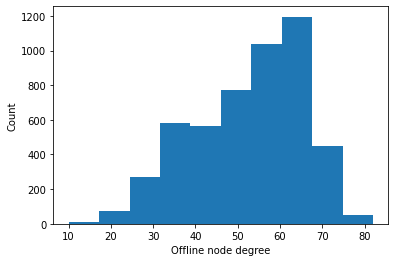

In [ ]:
plt.hist(degrees.flatten())
plt.xlabel('Offline node degree')
plt.ylabel('Count')
plt.show()

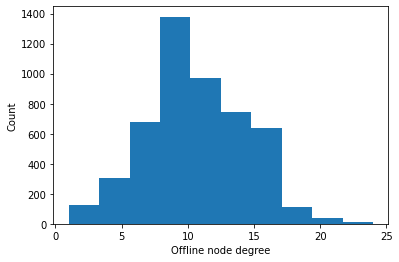

In [ ]:
plt.hist(degrees.flatten())
plt.xlabel('Offline node degree')
plt.ylabel('Count')
plt.show()

In [ ]:
config = {
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 0.5
    }
edge_weight_dist(config)

In [ ]:
import matplotlib.pyplot as plt
outputs = [
  (
    [0.934, 0.919, 0.909, 0.910, 0.908, 0.905, 0.909, 0.909, 0.910],
    [0.898, 0.867, 0.845, 0.838, 0.829, 0.798, 0.782, 0.763, 0.761],
    'GMISSION'
  ),
  (
    [0.915, 0.911, 0.934, 0.950, 0.962, 0.965, 0.965, 0.968, 0.969],
    [0.956, 0.921, 0.888, 0.876, 0.864, 0.852, 0.847, 0.842, 0.846],
    'ER'
  ),
  (
    [0.909, 0.906, 0.918, 0.929, 0.942, 0.943, 0.952, 0.950, 0.955],
    [0.875, 0.828, 0.821, 0.806, 0.796, 0.795, 0.788, 0.774, 0.774],
    'BA'
  ),
  (
    [0.859, 0.861, 0.882, 0.903, 0.930, 0.936, 0.949, 0.949, 0.953],
    [0.961, 0.941, 0.905, 0.875, 0.855, 0.838, 0.825, 0.814, 0.804],
    'GEOM'
  ),
]

node_seq = [n/16 for n in range(16, 52, 4)]

for output in outputs:
    plt.plot(node_seq, output[0], label=f'GNN')
    plt.plot(node_seq, output[1], label=f'Greedy')
    plt.legend()
    plt.title(output[2])
    plt.xlabel('Offline/Online ratio')
    plt.ylabel('Competitive ratio')
    plt.show()

In [ ]:
m = 10; n = 10; num_trials = 1

# config = {
#     'graph_type': 'ER',
#     'p': 0.75,
#     'weighted': True
# }
# config = {
#         'graph_type': 'BA',
#         'ba_param': 3,
#         'weighted': True
# }
config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}
# config = {
#         'graph_type': 'GM'
# }
def diagnose(hints, preds):
    return np.max(hints) - hints[np.argmax(preds)]
    
lost_weights = []
choices = []
no_skips = []

for i in range(num_trials):
    A = gg.sample_bipartite_graph(m, n, **config)
    p = [0.8 for _ in range(m)]
    cache = dp.cache_stochastic_opt(A, p)
    coin_flips = [np.random.binomial(1, _p) for _p in p]
    all_nodes = np.arange(n + m + 1)
    offline_nodes = frozenset(np.arange(n))
    OPT = cache[0][offline_nodes][0]
    matching = []
    value = 0
    for t in range(m):
        if coin_flips[t]:
            input = gg._to_pyg_test(A, p, offline_nodes, t)
            hints = dp.one_step_stochastic_opt(A, offline_nodes, t, cache)
            opt_index = np.argmax(hints)
            pred = trained_model(input.x, input.edge_index, input.edge_attr, input.batch, input.graph_features)
            preds = pred[input.neighbors].detach().numpy()
            chosen_index = np.argmax(preds)
            choice = all_nodes[input.neighbors][chosen_index]
            lost_weight = diagnose(hints, preds) / OPT

            #print(hints, preds, A[t,:][input.neighbors.detach().numpy()[:12]])
            choices.append(opt_index == chosen_index)
            print(opt_index, chosen_index, hints[opt_index], hints[chosen_index], len(hints) - 1)
            no_skips.append(chosen_index == len(hints) - 1)

            lost_weights.append(lost_weight)
            #print(f"Lost weight: {lost_weight}")
            
            
            if choice < n:            
                matching.append((t, choice))
                value += A[t, choice]

        
            offline_nodes = diff(offline_nodes, choice)
    greedy_matching, greedy_val = dp.greedy(A, coin_flips, 0)
    # print(len(matching), value, len(greedy_matching), greedy_val, matching, greedy_matching)
    # print(A[0,0])

In [ ]:
np.mean(no_skips)

In [ ]:
np.mean(choices)

In [ ]:
plt.hist(lost_weights, bins=25)
print(np.mean(lost_weights).round(3), np.std(lost_weights).round(3), len(lost_weights) / 250)
print(np.quantile(lost_weights, [0.1 * x for x in range(1,10)]))
plt.show()

In [ ]:
plt.hist(lost_weights, bins=25)
print(np.mean(lost_weights).round(3), np.std(lost_weights).round(3), len(lost_weights))
print(np.quantile(lost_weights, [0.1 * x for x in range(1,10)]))
plt.show()

In [ ]:
m = 14; n = 8; num_trials = 100

# config = {
#     'graph_type': 'ER',
#     'p': 0.75,
#     'weighted': True
# }
config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}
def error_code(chosen_index, pred_index, length):
    if chosen_index == pred_index and chosen_index == length - 1:
        return "Correct"
    elif chosen_index == pred_index:
        return "Correct"
    elif chosen_index == length - 1:
        return "Incorrect"
    elif pred_index == length - 1:
        return "Incorrect"
    else:
        return "Incorrect"
    
record = ([[] for _ in range(m)], [[] for _ in range(m)], [[] for _ in range(m)])
greedy_vals = []
learned_vals = []
for i in range(num_trials):
    A = gg.sample_bipartite_graph(m, n, **config)
    p = [1 for _ in range(m)]
    cache = dp.cache_stochastic_opt(A, p)
    coin_flips = [np.random.binomial(1, _p) for _p in p]
    all_nodes = np.arange(n + m + 1)
    offline_nodes = frozenset(np.arange(n))
    matching = []
    value = 0
    for t in range(m):
        if coin_flips[t]:
            input = gg._to_pyg_test(A, p, offline_nodes, t)
            pred = trained_model(input.x, input.edge_index, input.edge_attr, input.graph_features)
            
            hints = dp.one_step_stochastic_opt(A, offline_nodes, t, cache)
            hints = np.max(hints) - hints
            # print(t)
            # print(pred[input.neighbors].squeeze().detach().numpy())
            # print(hints)
            # print()
            chosen_index = np.argmin(pred[input.neighbors].detach().numpy())
            opt_index = np.argmin(hints)
            choice = all_nodes[input.neighbors][chosen_index]
            correct = (chosen_index == opt_index)
            reduction = hints[opt_index] - hints[chosen_index]
            record[0][t].append(error_code(opt_index, chosen_index, len(hints)))
            record[1][t].append(reduction)
            record[2][t].append(np.sum(input.neighbors.detach().numpy()))
            if choice < n:
                matching.append((t, choice))
                value += A[t, choice]
        
            offline_nodes = diff(offline_nodes, choice)

   
    opt_matching, opt_value = dp.stochastic_opt(A, coin_flips, cache)
    _, greed_value = dp.greedy(A, coin_flips, 0)
    learned_vals.append(value / opt_value)
    greedy_vals.append(greed_value / opt_value)

In [ ]:
#Need to predict skip more often?
import matplotlib.pyplot as plt
for t in range(m):
  labels, vals =  np.unique(record[0][t], return_counts=True)
  print(t, np.mean(np.array(record[0][t]) == 'Correct'), np.mean(record[2][t]))
  # plt.bar(labels, vals)
  # plt.xticks(rotation=45)
  # plt.show()

0 0.59 8.18
1 0.51 7.69
2 0.54 7.35
3 0.64 6.55
4 0.54 6.2
5 0.69 5.54
6 0.68 5.12
7 0.64 4.61
8 0.63 4.19
9 0.7 3.78
10 0.67 3.31
11 0.74 2.65
12 0.83 2.32
13 1.0 1.9

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(record[0])):
    print(f"Node: {i}, average reduction: {np.mean(record[1][i])}")
    print(f"Node: {i}, average neighbors: {np.mean(record[2][i])}")
    plt.hist(record[1][i], bins=10)
    plt.show()

In [ ]:
matching

In [ ]:
opt_matching

In [ ]:
value, opt_value

In [ ]:
greed_value

In [ ]:
def greedy_test(num_trials, node_configs, graph_configs, r):
    matched_weights = []
    for m, n in node_configs:
        for config in graph_configs:
            vals = []
            print(m, n, config)
            for _ in range(num_trials):
                A = gg.sample_bipartite_graph(m, n, **config)
                p = [0.8 for _ in range(m)]
                coin_flips = [np.random.binomial(1, _p) for _p in p]
                matching, val = dp.greedy(A, coin_flips, r)
                matched_weight = [A[t, i] for (t, i) in matching]
                matched_weights.append(matched_weight)
                vals.append(val / dp.offline_opt(A, coin_flips)[1])
            mean_ratio = np.mean(vals)
            std_ratio = np.std(vals, ddof=1)
            print(f"Stoch opt competitive ratio: {np.round(mean_ratio, 3)} ± {np.round(2 * std_ratio / np.sqrt(num_trials), 3)}")
            print()
    return np.array(matched_weights)


num_trials = 1000
node_configs = [(50, 10)]
graph_configs = [
    {
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 1 / np.sqrt(2)
    }
]



In [ ]:
matched_weights = greedy_test(num_trials, node_configs, graph_configs, 0)
matched_weights.mean(axis=0)

In [ ]:
matched_weights = greedy_test(num_trials, node_configs, graph_configs, 0)
matched_weights.mean(axis=0)

In [ ]:
greedy_test(num_trials, node_configs, graph_configs, 0)

In [ ]:
greedy_test(num_trials, node_configs, graph_configs, 0.25)

In [ ]:
greedy_test(num_trials, node_configs, graph_configs, 0.5)

In [ ]:
greedy_test(num_trials, node_configs, graph_configs, 0.75)

In [ ]:
m = 5; n = 10
config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

A = gg.sample_bipartite_graph(m, n, **config)
for t in range(m):
  print(np.mean(A[t, :]), np.std(A[t, :]))

In [ ]:
config = {
    'graph_type': 'ER',
    'p': 0.75,
    'weighted': True
}

A = gg.sample_bipartite_graph(m, n, **config)
for t in range(m):
  print(np.mean(A[t, :]), np.std(A[t, :]))

In [ ]:
config = {
    'graph_type': 'BA',
    'ba_param': 4,
    'weighted': True
}

A = gg.sample_bipartite_graph(m, n, **config)
weights = A.flatten()
for t in range(m):
  print(np.mean(A[t, :]), np.std(A[t, :]))